In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
url2 = "https://drive.google.com/file/d/1LjD2uXTeioaG_JwMSTZnVRNaBCmfIyTb/view?usp=sharing"
url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]
print(url2)
df = pd.read_csv(url2)

https://drive.google.com/uc?id=1LjD2uXTeioaG_JwMSTZnVRNaBCmfIyTb


In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.describe()

,neo_id,absolute_magnitude(luminosity),estimated_diameter_min,estimated_diameter_max,average_diameter_km,relative_velocity_km_sec,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,0.255324,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,0.507861,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,0.000000,203.346432,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,0.041072,30712.031470,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,0.118452,47560.465470,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,0.305874,66673.820615,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,60.749487,291781.106600,7.479865e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neo_id                          338199 non-null  int64  
 1   name                            338199 non-null  object 
 2   absolute_magnitude(luminosity)  338171 non-null  float64
 3   estimated_diameter_min          338171 non-null  float64
 4   estimated_diameter_max          338171 non-null  float64
 5   average_diameter_km             338199 non-null  float64
 6   orbiting_body                   338199 non-null  object 
 7   relative_velocity_km_sec        338199 non-null  float64
 8   miss_distance                   338199 non-null  float64
 9   is_hazardous                    338199 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 23.5+ MB


In [ ]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude(luminosity)',
       'estimated_diameter_min', 'estimated_diameter_max',
       'average_diameter_km', 'orbiting_body', 'relative_velocity_km_sec',
       'miss_distance', 'is_hazardous'],
      dtype='object')

<ipython-input-8-805267a2c38d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_diameter_km'])


<Axes: xlabel='average_diameter_km', ylabel='Density'>

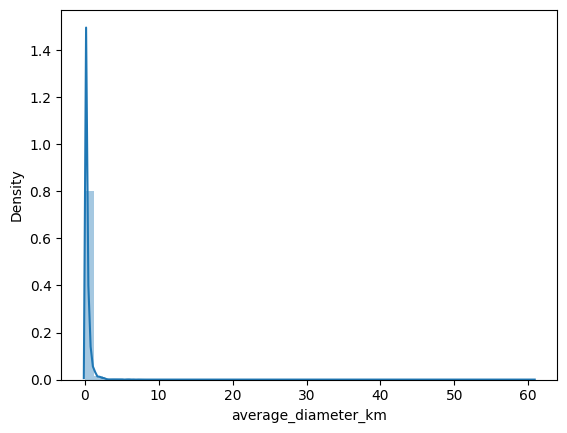

In [ ]:
import seaborn as sns
sns.distplot(df['average_diameter_km'])

<ipython-input-9-8cde8cf6d493>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['relative_velocity_km_sec'])


<Axes: xlabel='relative_velocity_km_sec', ylabel='Density'>

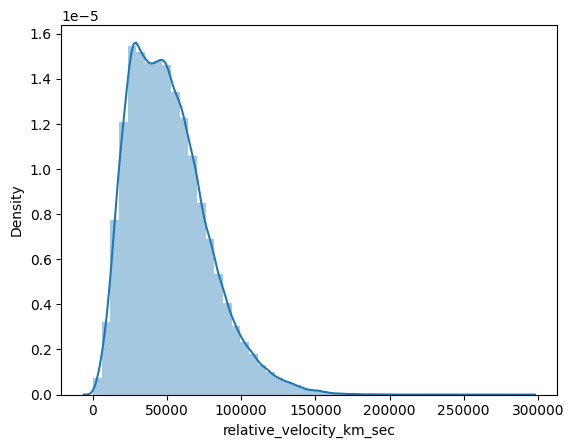

In [ ]:
sns.distplot(df['relative_velocity_km_sec'])

In [ ]:
# Check for missing values
df.isnull().sum()

neo_id                             0
name                               0
absolute_magnitude(luminosity)    28
estimated_diameter_min            28
estimated_diameter_max            28
average_diameter_km                0
orbiting_body                      0
relative_velocity_km_sec           0
miss_distance                      0
is_hazardous                       0
dtype: int64

In [ ]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude(luminosity)',
       'estimated_diameter_min', 'estimated_diameter_max',
       'average_diameter_km', 'orbiting_body', 'relative_velocity_km_sec',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [ ]:
# Fill missing values with the mean for numerical columns
df['absolute_magnitude(luminosity)'].fillna(df['absolute_magnitude(luminosity)'].mean(), inplace=True)
df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].mean(), inplace=True)
df['estimated_diameter_max'].fillna(df['estimated_diameter_max'].mean(), inplace=True)

In [ ]:
# Summary statistics
df.describe()

,neo_id,absolute_magnitude(luminosity),estimated_diameter_min,estimated_diameter_max,average_diameter_km,relative_velocity_km_sec,miss_distance
count,3.381990e+05,338199.000000,338199.000000,338199.000000,338199.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,0.255324,51060.662908,4.153535e+07
std,2.287225e+07,2.911096,0.313872,0.701839,0.507861,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,0.000000,203.346432,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,0.041072,30712.031470,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,0.118452,47560.465470,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,0.305874,66673.820615,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,60.749487,291781.106600,7.479865e+07


<Axes: >

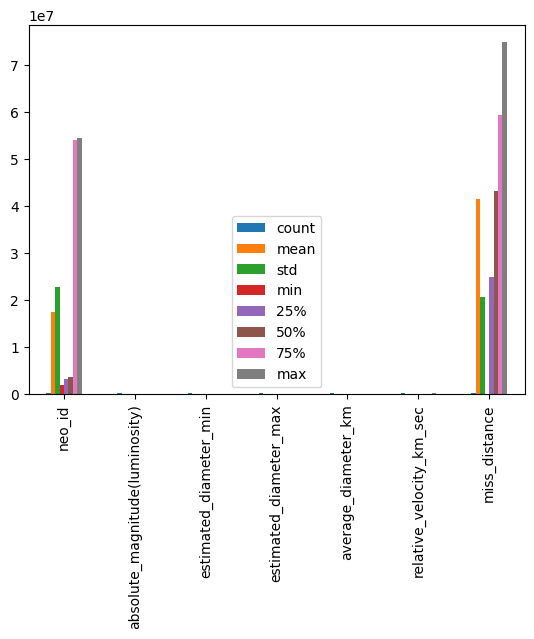

In [ ]:
df.describe().T.plot(kind='bar')

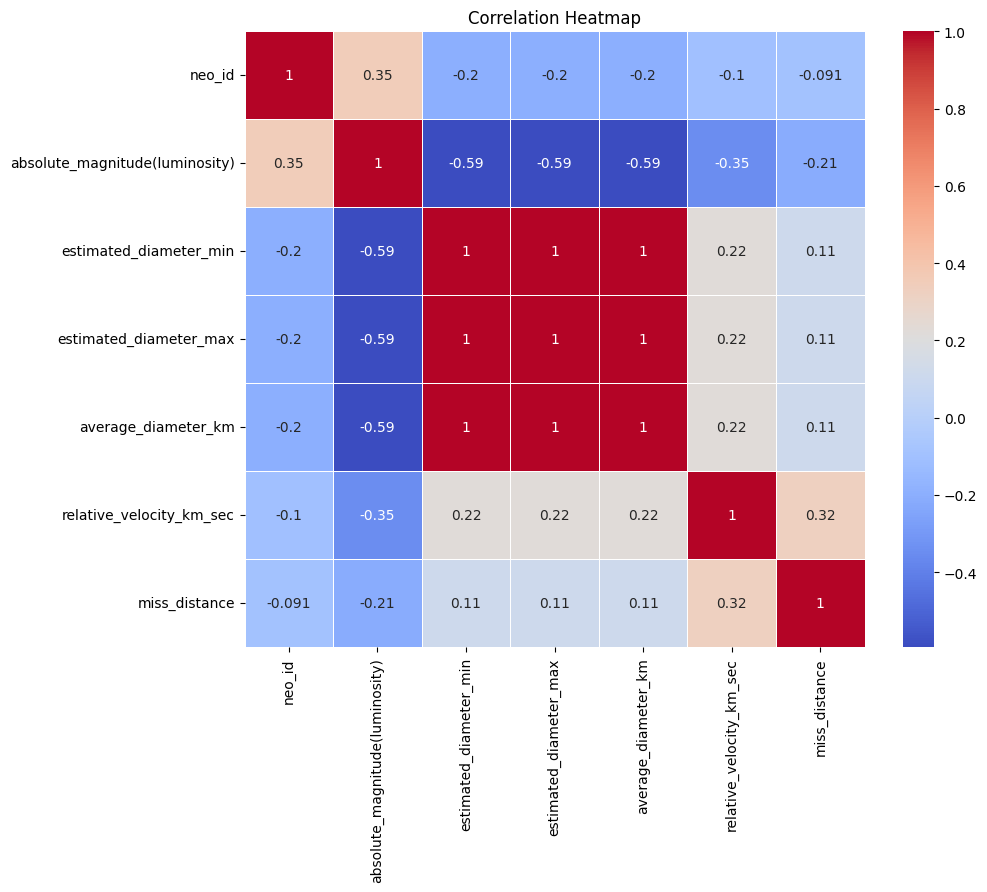

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

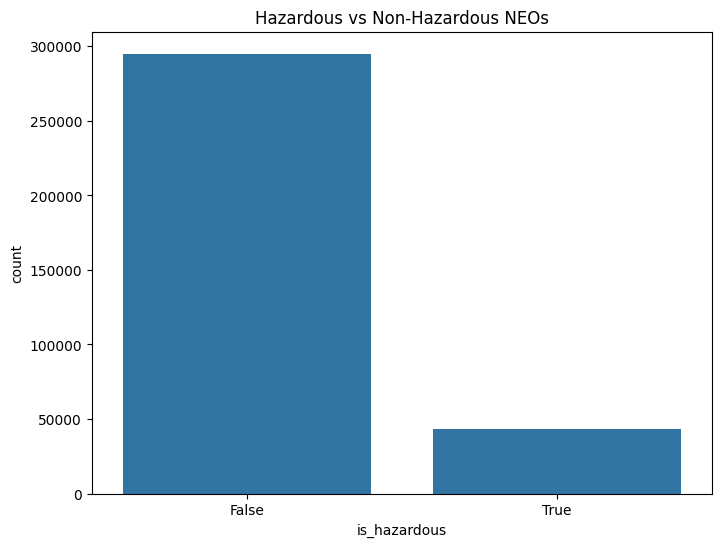

In [ ]:
# Count plot of hazardous vs non-hazardous NEOs
plt.figure(figsize=(8, 6))
sns.countplot(x='is_hazardous', data=df)
plt.title('Hazardous vs Non-Hazardous NEOs')
plt.show()

In [ ]:
# Prepare data for prediction
X = df[['absolute_magnitude(luminosity)', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity_km_sec', 'miss_distance']]
y = df['is_hazardous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy, report, conf_matrix

(0.9161935738221959,
 '              precision    recall  f1-score   support\n\n       False       0.94      0.97      0.95     88468\n        True       0.72      0.57      0.64     12992\n\n    accuracy                           0.92    101460\n   macro avg       0.83      0.77      0.79    101460\nweighted avg       0.91      0.92      0.91    101460\n',
 array([[85507,  2961],
        [ 5542,  7450]]))

In [ ]:
 df.columns.to_list()

['neo_id',
 'name',
 'absolute_magnitude(luminosity)',
 'estimated_diameter_min',
 'estimated_diameter_max',
 'average_diameter_km',
 'orbiting_body',
 'relative_velocity_km_sec',
 'miss_distance',
 'is_hazardous']

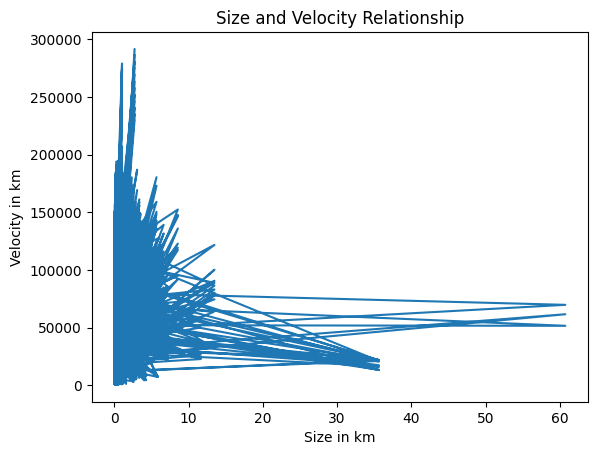

In [ ]:
x = df['average_diameter_km']
y = df['relative_velocity_km_sec']

plt.plot(x, y)
plt.xlabel('Size in km')
plt.ylabel('Velocity in km')
plt.title('Size and Velocity Relationship')
plt.show()

In [ ]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude(luminosity)',
       'estimated_diameter_min', 'estimated_diameter_max',
       'average_diameter_km', 'orbiting_body', 'relative_velocity_km_sec',
       'miss_distance', 'is_hazardous'],
      dtype='object')

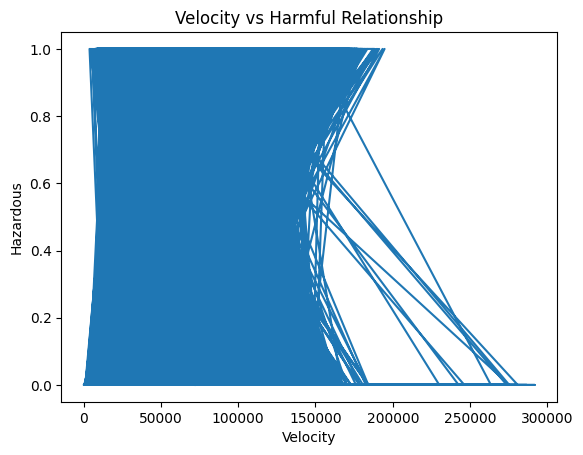

In [ ]:
x = df['relative_velocity_km_sec']
y = df['is_hazardous']

plt.plot(x, y)
plt.xlabel('Velocity')
plt.ylabel('Hazardous')
plt.title('Velocity vs Harmful Relationship')
plt.show()

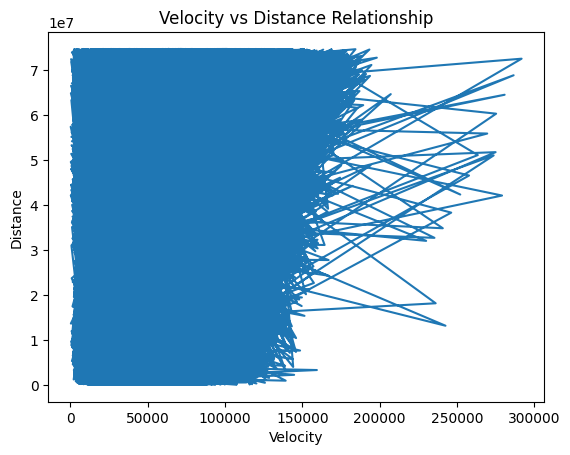

In [ ]:
x = df['relative_velocity_km_sec']
y = df['miss_distance']

plt.plot(x, y)
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.title('Velocity vs Distance Relationship')
plt.show()

In [ ]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude(luminosity)',
       'estimated_diameter_min', 'estimated_diameter_max',
       'average_diameter_km', 'orbiting_body', 'relative_velocity_km_sec',
       'miss_distance', 'is_hazardous'],
      dtype='object')

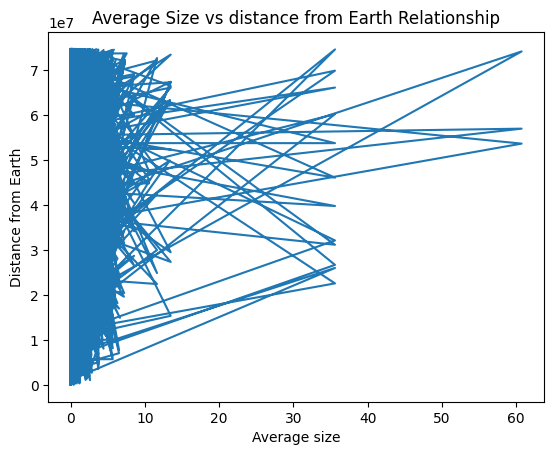

In [ ]:
x = df['average_diameter_km']
y = df['miss_distance']

plt.plot(x, y)
plt.xlabel('Average size')
plt.ylabel('Distance from Earth')
plt.title('Average Size vs distance from Earth Relationship')
plt.show()